<h3>Import Packages

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, accuracy_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

<h3> Data Loading

In [2]:
train = pd.read_csv('train.csv', sep = ',')
validate = pd.read_csv('validate.csv', sep = ',')
test = pd.read_csv('test.csv', sep = ',')

<h3>Random forest on base model

In [8]:
feature_cols = [col for col in train.columns if (col != 'fraud')]
target_col = ['fraud']
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_validate = validate[feature_cols].copy()
y_validate = validate[target_col].copy()
X_test  = test[feature_cols].copy()
y_test  = test[target_col].copy()

In [9]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train.values.ravel())

y_pred_train = forest.predict(X_train)
y_pred_validate = forest.predict(X_validate)
y_pred_test = forest.predict(X_test)

In [10]:
print("Train Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('F1 score: {:0.4f}'.format(f1_score(y_train, y_pred_train)))
print('Precision score: {:0.4f}'.format(precision_score(y_train, y_pred_train)))
print('Recall score: {:0.4f}'.format(recall_score(y_train, y_pred_train)))
print("_________________________________________________________")

print("Validate Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_validate, y_pred_validate)))
print('F1 score: {:0.4f}'.format(f1_score(y_validate, y_pred_validate)))
print('Precision score: {:0.4f}'.format(precision_score(y_validate, y_pred_validate)))
print('Recall score: {:0.4f}'.format(recall_score(y_validate, y_pred_validate)))
print("_________________________________________________________")

print("Test Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('F1 score: {:0.4f}'.format(f1_score(y_test, y_pred_test)))
print('Precision score: {:0.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall score: {:0.4f}'.format(recall_score(y_test, y_pred_test)))
print("_________________________________________________________")

Train Data
Accuracy score: 1.0000
F1 score: 1.0000
Precision score: 1.0000
Recall score: 1.0000
_________________________________________________________
Validate Data
Accuracy score: 0.9960
F1 score: 0.9582
Precision score: 0.9681
Recall score: 0.9485
_________________________________________________________
Test Data
Accuracy score: 0.9962
F1 score: 0.9578
Precision score: 0.9676
Recall score: 0.9483
_________________________________________________________


<h3>Feature Engineering

In [11]:
train['totalItems'] = train['totalScanTimeInSeconds'] * train['scannedLineItemsPerSecond']
validate['totalItems'] = validate['totalScanTimeInSeconds'] * validate['scannedLineItemsPerSecond']
test['totalItems'] = test['totalScanTimeInSeconds'] * test['scannedLineItemsPerSecond']

<h3> Random forest on selected features

In [15]:
selected_features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'totalItems']
feature_cols = [col for col in train.columns if (col != 'fraud')]
target_col = ['fraud']

X_train_selected_features = train[feature_cols].copy()
X_validate_selected_features = validate[feature_cols].copy()
X_test_selected_features  = test[feature_cols].copy()

In [16]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_selected_features, y_train.values.ravel())

y_pred_train = forest.predict(X_train_selected_features)
y_pred_validate = forest.predict(X_validate_selected_features)
y_pred_test = forest.predict(X_test_selected_features)

In [17]:
print("Train Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('F1 score: {:0.4f}'.format(f1_score(y_train, y_pred_train)))
print('Precision score: {:0.4f}'.format(precision_score(y_train, y_pred_train)))
print('Recall score: {:0.4f}'.format(recall_score(y_train, y_pred_train)))
print("_________________________________________________________")

print("Validate Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_validate, y_pred_validate)))
print('F1 score: {:0.4f}'.format(f1_score(y_validate, y_pred_validate)))
print('Precision score: {:0.4f}'.format(precision_score(y_validate, y_pred_validate)))
print('Recall score: {:0.4f}'.format(recall_score(y_validate, y_pred_validate)))
print("_________________________________________________________")

print("Test Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('F1 score: {:0.4f}'.format(f1_score(y_test, y_pred_test)))
print('Precision score: {:0.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall score: {:0.4f}'.format(recall_score(y_test, y_pred_test)))
print("_________________________________________________________")

Train Data
Accuracy score: 1.0000
F1 score: 1.0000
Precision score: 1.0000
Recall score: 1.0000
_________________________________________________________
Validate Data
Accuracy score: 0.9980
F1 score: 0.9797
Precision score: 0.9771
Recall score: 0.9823
_________________________________________________________
Test Data
Accuracy score: 0.9980
F1 score: 0.9782
Precision score: 0.9779
Recall score: 0.9785
_________________________________________________________


Complex trees are more likely to overfit -- deeper tree can capture more intricate patterns but is more prone to overfitting

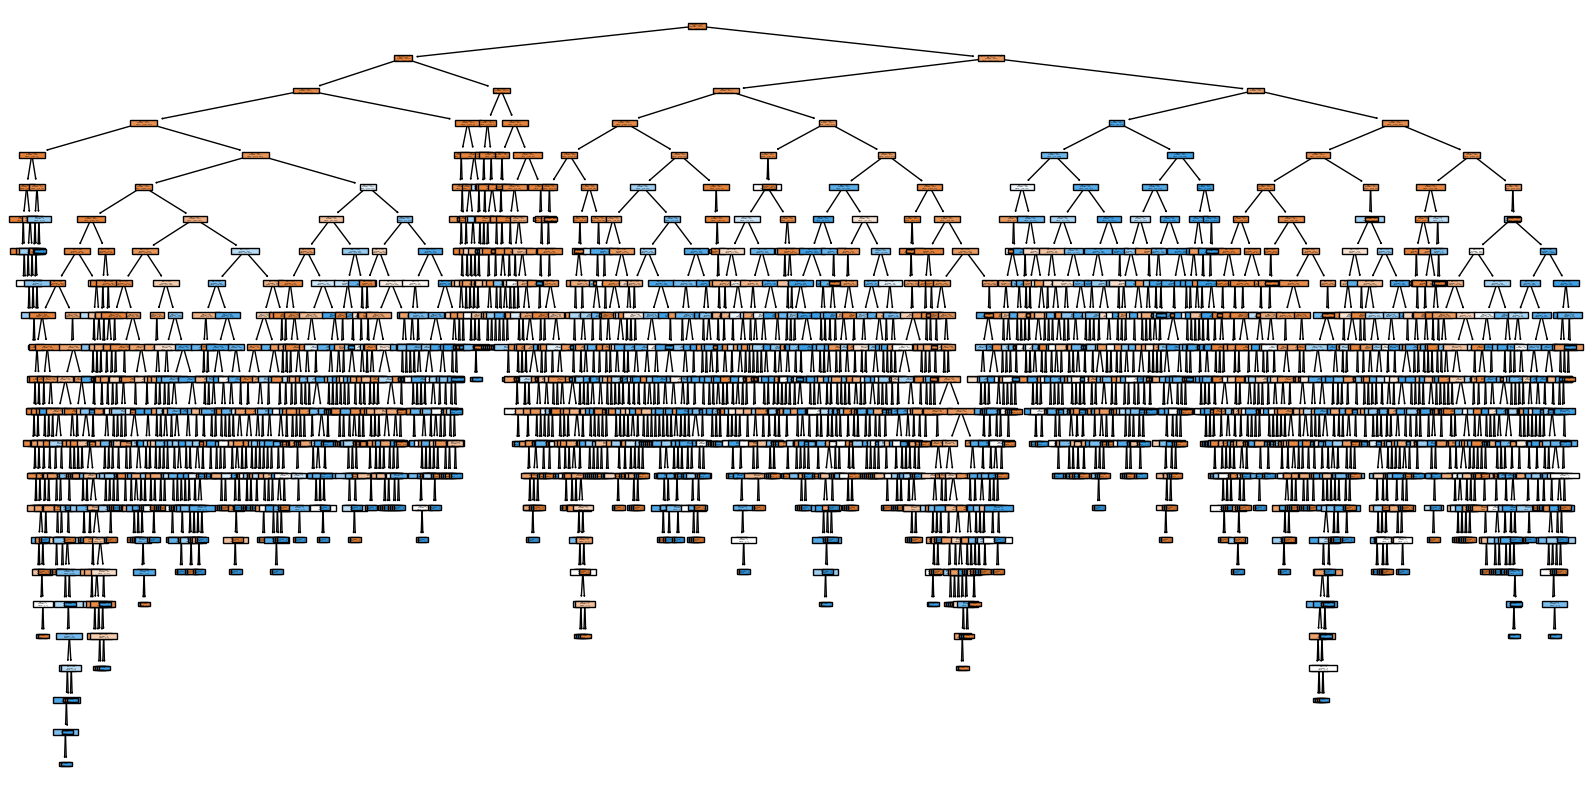

In [18]:
# Assuming 'forest' is your trained RandomForestClassifier
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(forest.estimators_[0], feature_names=feature_cols, filled=True)
plt.show()

<h3>Hyperparameter Tuning

Find the current parameters used by random forest

In [20]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


<h4>Random Search

In [ ]:
# Define the Random Forest classifier
forest = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 1000), 
    'max_depth': randint(3, 10), 
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20), 
    'max_features': [1,2,3]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    forest, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1
)

In [23]:
# Fit the Randomized Search to find the best hyperparameters
random_search.fit(X_train_selected_features, y_train.values.ravel())

# Print the best hyperparameters and their corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)

Best Parameters:  {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 848}
Best F1 Score:  0.8804628348332161


In [37]:
selected_features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'totalItems']

feature_cols = [col for col in selected_features]
target_col = ['fraud']
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_validate = validate[feature_cols].copy()
y_validate = validate[target_col].copy()
X_test = test[feature_cols].copy()
y_test = test[target_col].copy()

# Define the best parameters obtained from hyperparameter tuning
best_params = {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 848}
# Initialize the Random Forest classifier with the best parameters
forest_best_params = RandomForestClassifier(**best_params, random_state=0)
forest_best_params.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=9, max_features=2, min_samples_leaf=8,
                       min_samples_split=17, n_estimators=848, random_state=0)

In [38]:
# Predictions on the training set
y_pred_train = forest_best_params.predict(X_train)
y_pred_validate = forest_best_params.predict(X_validate)
y_pred_test = forest_best_params.predict(X_test)

In [39]:
print("Train Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('F1 score: {:0.4f}'.format(f1_score(y_train, y_pred_train)))
print('Precision score: {:0.4f}'.format(precision_score(y_train, y_pred_train)))
print('Recall score: {:0.4f}'.format(recall_score(y_train, y_pred_train)))
print("_________________________________________________________")

print("Validate Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_validate, y_pred_validate)))
print('F1 score: {:0.4f}'.format(f1_score(y_validate, y_pred_validate)))
print('Precision score: {:0.4f}'.format(precision_score(y_validate, y_pred_validate)))
print('Recall score: {:0.4f}'.format(recall_score(y_validate, y_pred_validate)))
print("_________________________________________________________")

print("Test Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('F1 score: {:0.4f}'.format(f1_score(y_test, y_pred_test)))
print('Precision score: {:0.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall score: {:0.4f}'.format(recall_score(y_test, y_pred_test)))
print("_________________________________________________________")

Train Data
Accuracy score: 0.9954
F1 score: 0.9510
Precision score: 0.9686
Recall score: 0.9341
_________________________________________________________
Validate Data
Accuracy score: 0.9940
F1 score: 0.9365
Precision score: 0.9606
Recall score: 0.9135
_________________________________________________________
Test Data
Accuracy score: 0.9946
F1 score: 0.9396
Precision score: 0.9630
Recall score: 0.9174
_________________________________________________________


<h4>Tree looks less complex now

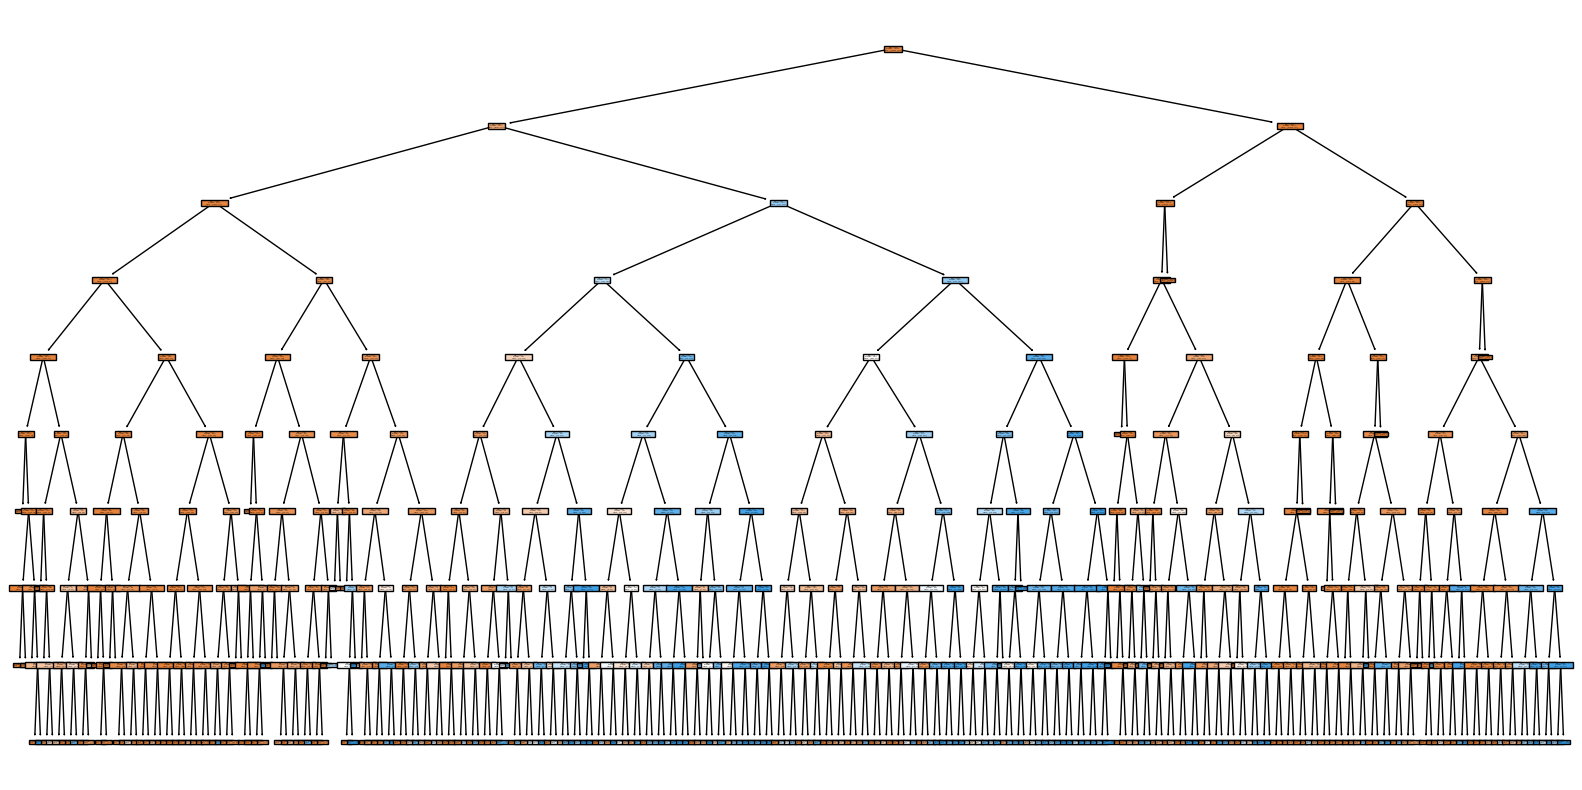

In [40]:
plt.figure(figsize=(20, 10))  
plot_tree(forest_best_params.estimators_[0], feature_names=feature_cols, filled=True)
plt.show()
